### Knock airport Weather

This notebook contains the assignment 6 (assignment_6_Weather) of the Lecture 6 of the module Programming for Data Analytics. 

Author: Jennifer Ibanez Cano

In this notebook I'll analyze the data related with the Knock Airport weather. 

Using this [dataset](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

The first part of the assignment consist to plot:
- The temperature.
- The mean temperature each day.
- The mean temperature for each month. 

The second part of the assigment consist to plot:
- The Windspeed.
- The rolling windspeed (over 24 hours).
- The max windspeed for each day.
- The monthly mean of the daily max windspeeds.

In [105]:
# First I'll need to import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime 
import seaborn as sns

In [106]:
# Get the data. 

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=22)
df


/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_17471/126776031.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,2,5,2,220,,,0.0,,0,8
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,2,5,2,230,,,0.0,,0,8
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,2,4,2,210,,,0.0,,0,8
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,2,6,2,200,,,0.0,,0,8


In [107]:
# Applying dropna() to remove possible NaN values, 

df = df.dropna()

In [108]:
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [109]:
# Getting the data related to the temperature and the date.

df[['date', 'temp']]

,date,temp
0,10-apr-1996 14:00,11.5
1,31-jul-1996 08:00,11.5
2,31-jul-1996 09:00,11.6
3,31-jul-1996 10:00,12.9
4,31-jul-1996 11:00,14.5
...,...,...
247669,31-oct-2024 20:00,10.1
247670,31-oct-2024 21:00,10.1
247671,31-oct-2024 22:00,10.0
247672,31-oct-2024 23:00,9.8


In [110]:
df[['date','temp']].describe()

,temp
count,247674.00000
mean,8.76682
std,4.60478
min,-6.90000
25%,5.40000
50%,8.80000
75%,12.00000
max,28.50000


In [111]:
# create new columns for day, month and year.

df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,day,month,year
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,10,4,1996
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,31,7,1996
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,31,7,1996
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,25,82,0.0,28000,35,6,31,7,1996
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,2,11,0.0,40000,40,6,31,7,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,220,,,0.0,,0,8,31,10,2024
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,230,,,0.0,,0,8,31,10,2024
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,210,,,0.0,,0,8,31,10,2024
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,200,,,0.0,,0,8,31,10,2024


In [112]:
df[['temp','day','month','year']]


,temp,day,month,year
0,11.5,10,4,1996
1,11.5,31,7,1996
2,11.6,31,7,1996
3,12.9,31,7,1996
4,14.5,31,7,1996
...,...,...,...,...
247669,10.1,31,10,2024
247670,10.1,31,10,2024
247671,10.0,31,10,2024
247672,9.8,31,10,2024


#### Part 1 of the assignment.  

##### Plot the Temperature.

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_17471/1697476335.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


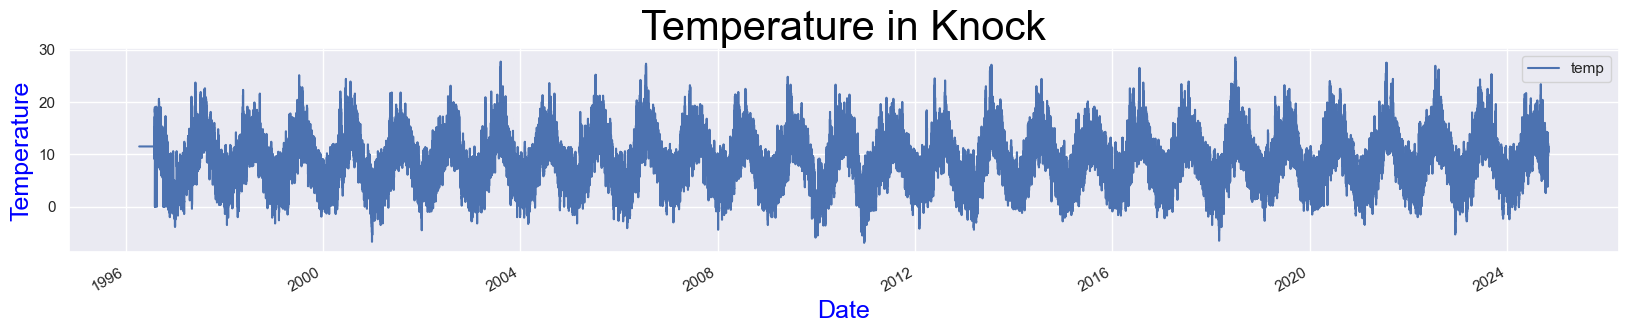

In [113]:
# Create a plot with the temperature of the whole dataset.

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot the temperature and date.
df[['date', 'temp']].plot(x='date', y='temp', kind='line', figsize=(20, 3))

plt.title("Temperature in Knock", fontsize=30, color='black') 
plt.xlabel("Date", fontsize=18, color='blue')
plt.ylabel("Temperature", fontsize=18, color='blue')
plt.show()

In [114]:
# get the mean temperature for each day
df.groupby('date')['temp'].mean()

date
1996-04-10 14:00:00    11.5
1996-07-31 08:00:00    11.5
1996-07-31 09:00:00    11.6
1996-07-31 10:00:00    12.9
1996-07-31 11:00:00    14.5
                       ... 
2024-10-31 20:00:00    10.1
2024-10-31 21:00:00    10.1
2024-10-31 22:00:00    10.0
2024-10-31 23:00:00     9.8
2024-11-01 00:00:00     9.7
Name: temp, Length: 247674, dtype: float64

##### Plot the mean temperature each day. 

In [115]:
# Get together the year, month and day columns into a single column.

df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0        1996-04-10
1        1996-07-31
2        1996-07-31
3        1996-07-31
4        1996-07-31
            ...    
247669   2024-10-31
247670   2024-10-31
247671   2024-10-31
247672   2024-10-31
247673   2024-11-01
Name: date, Length: 247674, dtype: datetime64[ns]

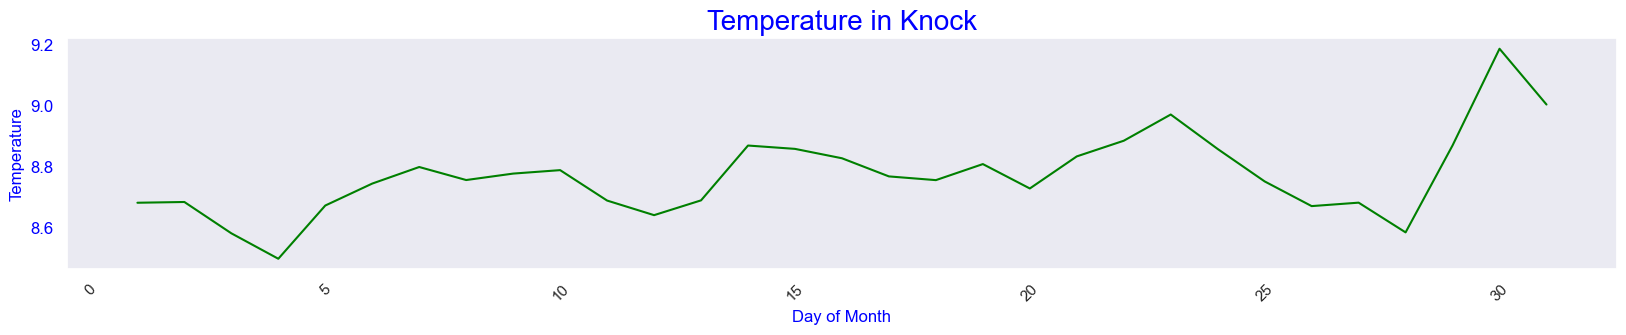

In [116]:
# Get the mean temperature for each day of the month. 
# First I need to create the columns for the daily, monthly and yearly temperature.
# Then I'll calculate the mean temperature for each day of the month.

df['daily'] = pd.to_datetime(df['date'], errors='coerce').dt.day
df['monthly'] = pd.to_datetime(df['date'], errors='coerce').dt.month    
df['yearly'] = pd.to_datetime(df['date'], errors='coerce').dt.year

df['daily_temp'] = df.groupby(['daily', 'monthly', 'yearly'])['temp'].transform('mean')
df['daily_temp']

mean_temp = df.groupby('daily')['daily_temp'].mean()

# Plotting the data
fig, ax = plt.subplots()
ax.plot(mean_temp.index, mean_temp, color='green')
ax.set(xlabel="Day of Month", ylabel="Temperature", title="Temperature in Knock")
ax.title.set_color('blue')
ax.title.set_fontsize(20)
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
plt.xlabel("Day of Month", fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.yticks(fontsize=12, color='blue')
ax.grid()
plt.show()


##### Plot the mean temperature for each month. 

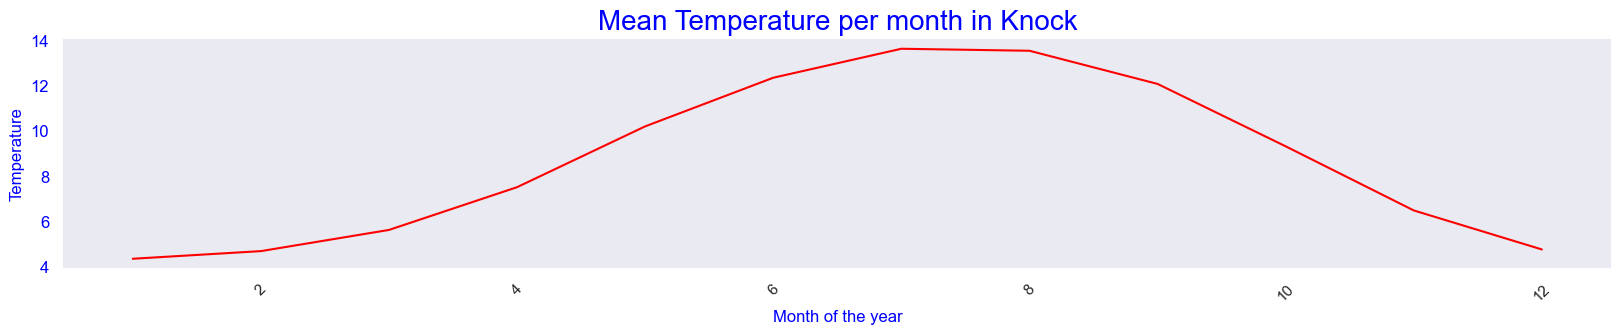

In [117]:
# Convert 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])  

median_temp = df['date'].map(lambda x: x.month)

temper = df.groupby(median_temp)['temp'].mean()

total = pd.DataFrame({'month': temper.index, 'Mean_Temperature': temper.values})

# Plotting the data
fig, ax = plt.subplots()
ax.plot(temper.index, temper.values, color='red')
ax.set(xlabel="Month", ylabel="Temperature", title="Mean Temperature per month in Knock")
ax.title.set_color('blue')
ax.title.set_fontsize(20)
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
plt.xlabel("Month of the year", fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.yticks(fontsize=12, color='blue')
ax.grid()
plt.show()

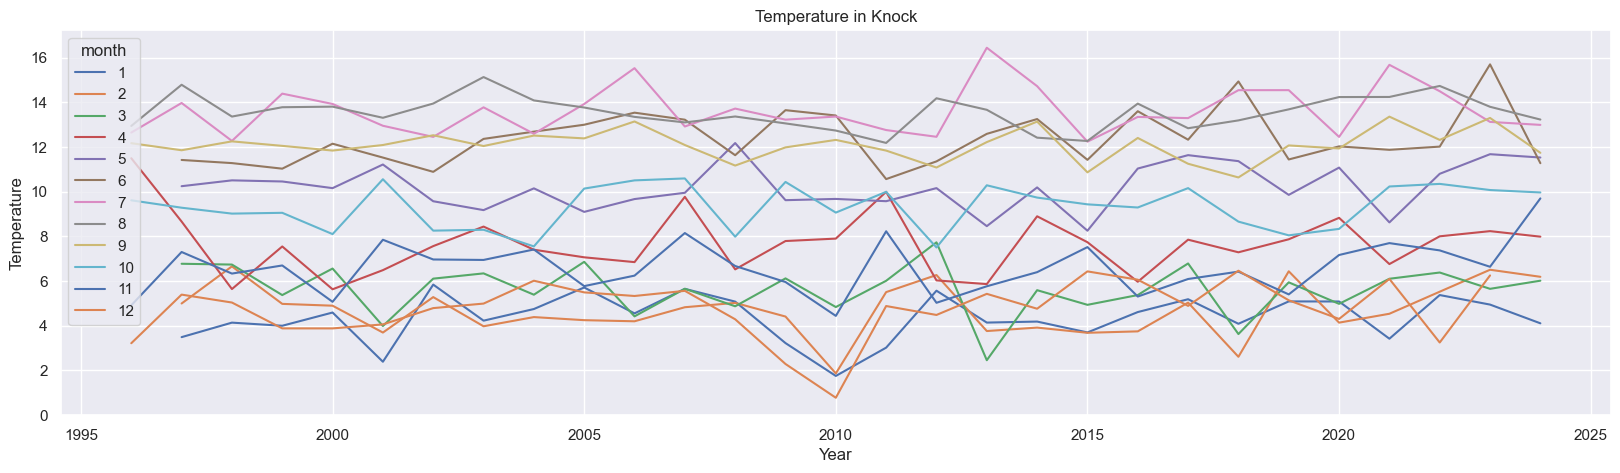

In [118]:
# create subplots with the mean temperature of the month in each year.

fig, ax = plt.subplots(figsize=(20, 5))
df.groupby(['year', 'month'])['temp'].mean().unstack().plot(ax=ax)
ax.set(title="Temperature in Knock", xlabel="Year", ylabel="Temperature")
plt.show()
